# Behaviour indicator

Examples of plotting data collecting behaviour for some different countries. Used indicators:
- wash_hands_24h_7orMore, 2020-06-27 to 2021-06-18
- contact, 2020-04-23 to 2021-06-18

In [1]:
import pandas as pd
import numpy as np
import datetime as DT
import requests
import json 

from matplotlib import pyplot as plt

%matplotlib inline  
#widget

In [22]:
# Contact in the last 24 hours
response_contact_IT = requests.get("https://covidmap.umd.edu/api/resources?indicator=contact&type=smoothed&country=Italy&daterange=20200423-20210618").text
response_contact_FR = requests.get("https://covidmap.umd.edu/api/resources?indicator=contact&type=smoothed&country=France&daterange=20200423-20210618").text
# Wash a lot the hands
response_hands = requests.get("https://covidmap.umd.edu/api/resources?indicator=contact&type=smoothed&country=Italy&daterange=20200627-20210618").text


jsonData_IT = json.loads(response_contact_IT)
jsonData_FR = json.loads(response_contact_FR)

jsonData1 = json.loads(response_hands)

df_contact_IT = pd.DataFrame.from_dict(jsonData_IT['data'])
df_contact_FR = pd.DataFrame.from_dict(jsonData_FR['data'])

df_hands_IT = pd.DataFrame.from_dict(jsonData1['data'])


In [26]:
#df_contact_IT
df_hands_IT

,smoothed_dc,smoothed_dc_se,sample_size,country,iso_code,gid_0,survey_date
0,0.534601,0.003836,34618.0,Italy,ITA,ITA,20200627
1,0.533646,0.003840,34381.0,Italy,ITA,ITA,20200628
2,0.533181,0.003842,34667.0,Italy,ITA,ITA,20200629
3,0.537651,0.003838,34825.0,Italy,ITA,ITA,20200630
4,0.536410,0.003836,34845.0,Italy,ITA,ITA,20200701
...,...,...,...,...,...,...,...
352,0.510117,0.013767,2076.0,Italy,ITA,ITA,20210614
353,0.516473,0.013742,2056.0,Italy,ITA,ITA,20210615
354,0.514814,0.013817,1997.0,Italy,ITA,ITA,20210616
355,0.517522,0.014313,1906.0,Italy,ITA,ITA,20210617


In [24]:
df_contact_IT["survey_date"] = pd.to_datetime(df_contact_IT['survey_date'])
df_contact_FR["survey_date"] = pd.to_datetime(df_contact_FR['survey_date'])


Text(0, 0.5, '% direct contact (> 1 minute) with others ')

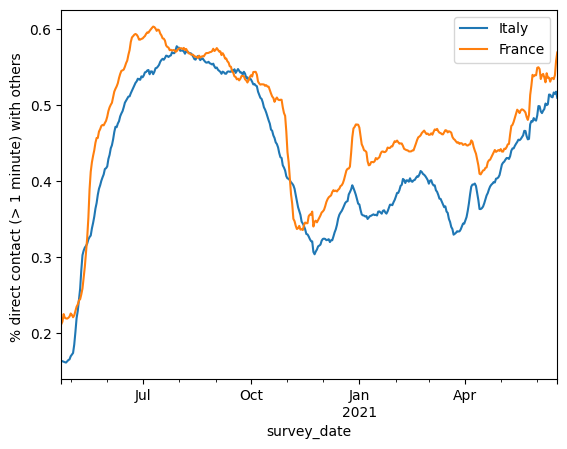

In [25]:
ax = df_contact_IT.plot(x="survey_date", y="smoothed_dc",label="Italy")
df_contact_FR.plot(x="survey_date", y="smoothed_dc", ax=ax,label="France")
ax.set_ylabel("% direct contact (> 1 minute) with others ")

Text(0, 0.5, '% washed their hands 7+ times in the last 24 hours')

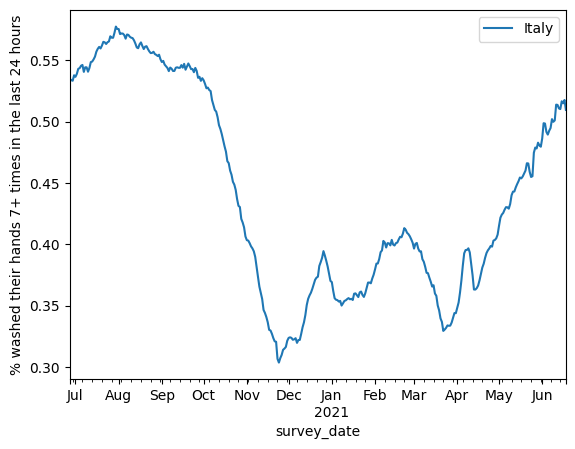

In [27]:
df_hands_IT["survey_date"] = pd.to_datetime(df_hands_IT['survey_date'])

ax = df_hands_IT.plot(x="survey_date", y="smoothed_dc",label="Italy")
#df_contact_FR.plot(x="survey_date", y="smoothed_dc", ax=ax,label="France")
ax.set_ylabel("% washed their hands 7+ times in the last 24 hours")
